<a href="https://colab.research.google.com/github/jessykappm/Machine-Learning/blob/main/Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo Titanic | Scikit Learn



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.drop('deck',axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


'sibsp' - Número de irmãos/cônjuges a bordo

'parch' - Número de pais/filhos a bordo

'fare' - Tarifa do passageiro (libra esterlina)

'embarked' - Porto de Embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


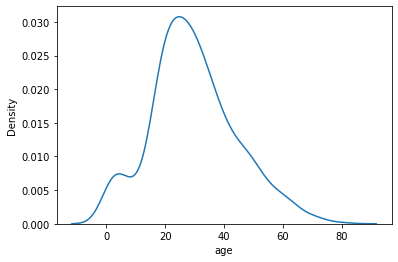

In [ ]:
df['age'] = np.round(df['age'],0)
df.info()
sns.kdeplot(df['age'])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
age,714.0,29.693277,14.524527,0.0,20.0000,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 69.0+ KB


# Visualizando os dados 

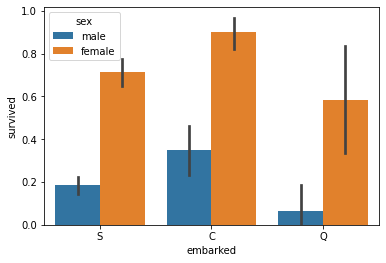

In [ ]:
sns.barplot(x="embarked", y="survived", hue="sex",data=df)

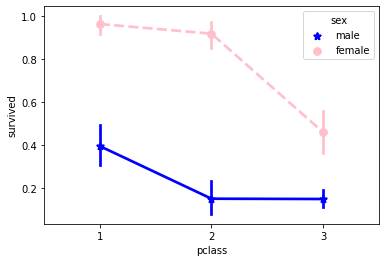

In [ ]:
sns.pointplot(x="pclass", y="survived", hue="sex", data=df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"],estimator=np.mean)

In [ ]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'], dtype=object)

In [ ]:
group=['sex','embarked', 'class', 'who','adult_male', 'embark_town','alive', 'alone']
df[group]

,sex,embarked,class,who,adult_male,embark_town,alive,alone
0,male,S,Third,man,True,Southampton,no,False
1,female,C,First,woman,False,Cherbourg,yes,False
2,female,S,Third,woman,False,Southampton,yes,True
3,female,S,First,woman,False,Southampton,yes,False
4,male,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...
885,female,Q,Third,woman,False,Queenstown,no,False
886,male,S,Second,man,True,Southampton,no,True
887,female,S,First,woman,False,Southampton,yes,True
889,male,C,First,man,True,Cherbourg,yes,True


In [ ]:
def uni(x,name):
  print( name, "- ",x.unique())

for i in range(len(group)):
  uni(df[group[i]],group[i])

sex -  ['male' 'female']
embarked -  ['S' 'C' 'Q']
class -  ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
who -  ['man' 'woman' 'child']
adult_male -  [ True False]
embark_town -  ['Southampton' 'Cherbourg' 'Queenstown']
alive -  ['no' 'yes']
alone -  [False  True]


In [ ]:
group

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'embark_town',
 'alive',
 'alone']

In [ ]:
from sklearn import preprocessing

for feature in group:
  le = preprocessing.LabelEncoder()
  le = le.fit(df[feature])
  df[feature] = le.transform(df[feature])

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,2,2,0,1,0,0
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,2,0,1
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,2,1,1
889,1,1,1,26.0,0,0,30.0000,0,0,1,1,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    int64  
 3   age          712 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   embarked     712 non-null    int64  
 8   class        712 non-null    int64  
 9   who          712 non-null    int64  
 10  adult_male   712 non-null    int64  
 11  embark_town  712 non-null    int64  
 12  alive        712 non-null    int64  
 13  alone        712 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 99.6 KB


In [ ]:
df[group].describe().T

,count,mean,std,min,25%,50%,75%,max
sex,712.0,0.636236,0.481420,0.0,0.0,1.0,1.0,1.0
embarked,712.0,1.595506,0.779038,0.0,2.0,2.0,2.0,2.0
class,712.0,1.240169,0.836854,0.0,0.0,1.0,2.0,2.0
who,712.0,1.186798,0.620961,0.0,1.0,1.0,2.0,2.0
adult_male,712.0,0.580056,0.493896,0.0,0.0,1.0,1.0,1.0
embark_town,712.0,1.595506,0.779038,0.0,2.0,2.0,2.0,2.0
alive,712.0,0.404494,0.491139,0.0,0.0,0.0,1.0,1.0
alone,712.0,0.564607,0.496157,0.0,0.0,1.0,1.0,1.0


In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,2,2,0,1,0,0
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,2,0,1
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,2,1,1
889,1,1,1,26.0,0,0,30.0000,0,0,1,1,0,1,1


In [ ]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'], dtype=object)

In [ ]:
label = df['alive']
features = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male','embark_town', 'alone']]

In [ ]:
label

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: alive, Length: 712, dtype: int64

In [ ]:
features

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,2,2,0,1,0
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,2,1
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,2,1
889,1,1,1,26.0,0,0,30.0000,0,0,1,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=num_test, random_state=23)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(10,10),
    max_iter=1000,
    solver="adam",
    verbose=True,
    random_state=0,
    learning_rate_init=0.001,
) # arquitetura 

mlp.fit(X_train, y_train) # model

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

In [ ]:
# X_train, X_test, y_train, y_test
mlp.score(X_train,y_train)

1.0

In [ ]:
# X_train, X_test, y_train, y_test
mlp.score(X_test,y_test)

1.0

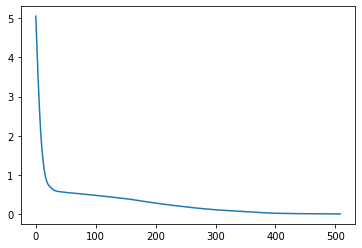

In [ ]:
plt.plot(np.arange(len(mlp.loss_curve_)),mlp.loss_curve_)
 #Evolução de perda

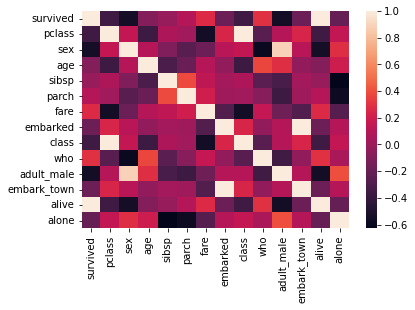

In [ ]:
sns.heatmap(df.corr())